# Importing Libraries

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Test set Image Processing

In [38]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'D:/fruit vegetable detection/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


# Loading Model

In [39]:
cnn = tf.keras.models.load_model('D:/fruit vegetable detection/fruit_model.keras')

#Visualising and Performing Prediction on Single image

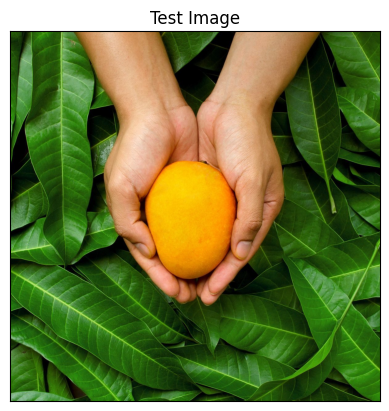

In [40]:
image_path = 'D:/fruit vegetable detection/test/mango/Image_1.jpg'
# Reading an image in default mode
img = plt.imread(image_path)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model

In [41]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [42]:
print(predictions)

[[1.7496459e-16 2.6953153e-17 2.6276097e-18 4.3716835e-21 4.2952487e-20
  7.5927783e-14 8.6136984e-17 4.7124996e-19 8.5029030e-15 1.5041950e-20
  1.5158992e-21 8.5115444e-28 1.5925989e-21 1.7545425e-19 1.7397493e-16
  7.3325741e-19 3.2395579e-17 2.0799266e-18 1.5543005e-21 1.0000000e+00
  1.9941928e-22 5.1428680e-16 1.4858994e-20 1.2649319e-18 5.0036153e-23
  3.9821418e-17 5.5247979e-17 1.0583360e-15 9.4155882e-23 3.0574779e-18
  6.5762684e-25 2.1543674e-17 3.3107289e-19 9.9470732e-17 1.5962841e-22
  1.7564773e-12]]


In [43]:
# test_set.class_names

In [44]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

19


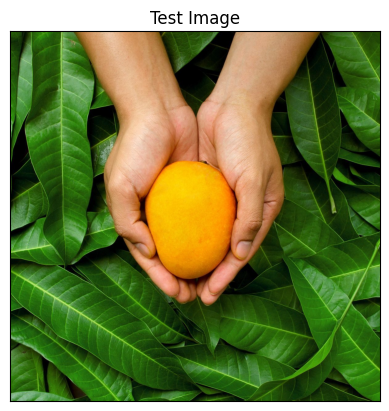

In [45]:
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [46]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a mango


In [47]:
import requests

# Replace with your Nutritionix App ID and API Key
APP_ID = "86c43594"
API_KEY = "5f1a74aec0e5091712372947997e50ba"

# Predicted fruit/vegetable from your model
fruit_name = test_set.class_names[result_index]

# API endpoint
url = "https://trackapi.nutritionix.com/v2/natural/nutrients"

# Send POST request
headers = {
    "x-app-id": APP_ID,
    "x-app-key": API_KEY,
    "Content-Type": "application/json"
}

data = {
    "query": fruit_name,
    "timezone": "US/Eastern"
}

response = requests.post(url, headers=headers, json=data)
if response.status_code == 200:
    nutrients = response.json()
    if nutrients.get("foods"):
        food_info = nutrients["foods"][0]
        print(f"{fruit_name} calories: {food_info['nf_calories']} kcal")
    else:
        print(f"No nutrient info found for {fruit_name}")
else:
    print(f"Error: {response.status_code}, {response.text}")


mango calories: 201.6 kcal
